In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cost import unroll

input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 1 to 10   
                         # (note that we have mapped "0" to label 10)

### Load the dataset

In [3]:
from scipy.io import loadmat

training_set = loadmat('training_set.mat')

X = training_set['X']  # Handwriting data
y = training_set['y']  # labels

### Display random selection of input data

<IPython.core.display.Javascript object>


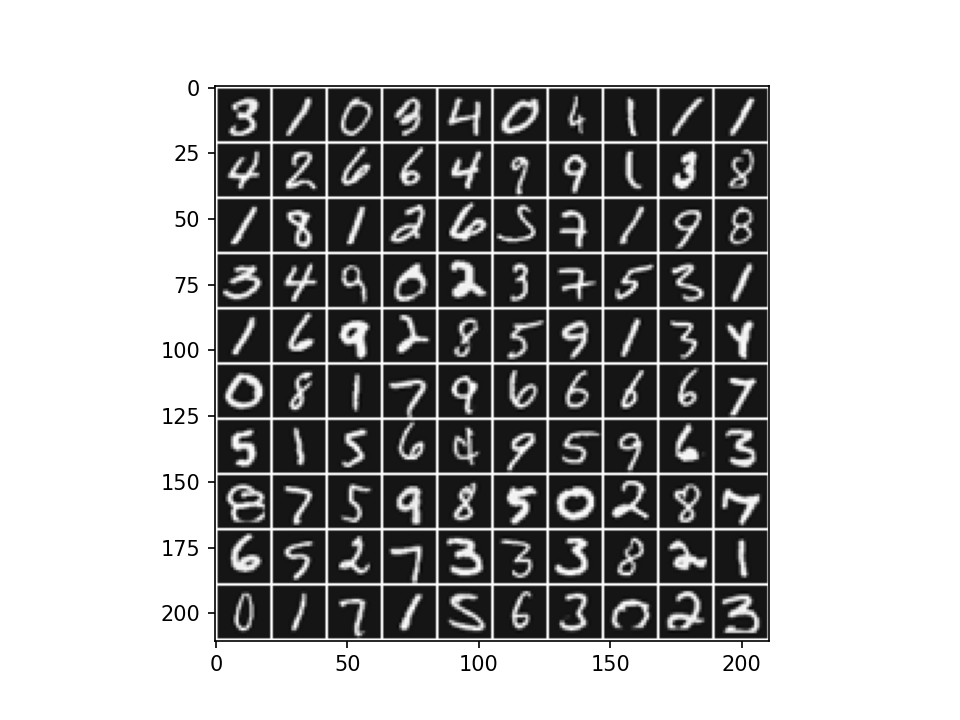

In [4]:
number_of_rows = X.shape[0]
rand_ind = np.random.choice(number_of_rows, size=100, replace=False)
selection = X[rand_ind]

from plotting import display_data

display_data(selection)

### Load weights

Load known weights to ensure that cost function is working correctly.

In [5]:
weights = loadmat('weights')

theta_1 = weights['Theta1']
theta_2 = weights['Theta2']

f'{X.shape= } | {theta_1.shape=} | {theta_2.shape=} | {y.shape=}'

'X.shape= (5000, 400) | theta_1.shape=(25, 401) | theta_2.shape=(10, 26) | y.shape=(5000, 1)'

### Cost function

For the weights above, this value should be about 0.287629.

In [6]:
from cost import nn_cost_function

nn_params = unroll(theta_1, theta_2)

J, gradients = nn_cost_function(
    nn_params=nn_params, 
    input_layer_size=input_layer_size, 
    hidden_layer_size=hidden_layer_size, 
    num_labels=num_labels,
    X=X,
    y=y,
    λ=0,
)

expected_value = 0.287629
assert abs(J - expected_value) < 1e-6

### Cost function with regularization

J should have a value of about 0.383770. The regularization is activated by setting the weight regularizations parameter to 1.

In [7]:
J, gradients = nn_cost_function(
    nn_params=nn_params, 
    input_layer_size=input_layer_size, 
    hidden_layer_size=hidden_layer_size, 
    num_labels=num_labels,
    X=X,
    y=y,
    λ=1,
)

expected_value = 0.383770
assert abs(J - expected_value) < 1e-6

### Check sigmoid gradients

In [8]:
from sigmoid import sigmoid_gradient

gradients = sigmoid_gradient(np.array([-1, -0.5, 0, 0.5, 1]))

expected_gradients = np.array([0.196612, 0.235004, 0.250000, 0.235004, 0.196612])
assert np.all(np.abs(gradients - expected_gradients) < 1e-6)

### Gradient checking

`check_nn_gradients` creates a small neural network to check the backpropagation gradients.  `λ` must be bigger than 0 to compute the gradients.

In [9]:
### Gradient checking

from gradient_checking import check_nn_gradients

λ=3
check_nn_gradients(λ)

J, gradients = nn_cost_function(
    nn_params=nn_params, 
    input_layer_size=input_layer_size, 
    hidden_layer_size=hidden_layer_size, 
    num_labels=num_labels,
    X=X,
    y=y,
    λ=λ,
)

expected_value = 0.576051
assert abs(J - expected_value) < 1e-6

Checking backprop
left: backprop, right: numerical
[[ 0.02260331  0.02260331]
 [ 0.05483847  0.05483847]
 [ 0.00864542  0.00864542]
 [-0.04549619 -0.04549619]
 [ 0.01176388  0.01176388]
 [-0.01668781 -0.01668781]
 [ 0.03949744  0.03949744]
 [ 0.05936892  0.05936892]
 [-0.00989909 -0.00989909]
 [-0.03283962 -0.03283962]
 [-0.06009438 -0.06009438]
 [-0.03209864 -0.03209864]
 [-0.0224812  -0.0224812 ]
 [ 0.05914574  0.05914574]
 [ 0.0388376   0.0388376 ]
 [-0.01717765 -0.01717765]
 [-0.01436865 -0.01436865]
 [-0.0451754  -0.0451754 ]
 [ 0.00889273  0.00889273]
 [ 0.05478492  0.05478492]
 [ 0.10934772  0.10934772]
 [ 0.11192295  0.11192295]
 [ 0.06049027  0.06049027]
 [ 0.01004041  0.01004041]
 [-0.001222   -0.001222  ]
 [ 0.03499284  0.03499284]
 [ 0.308133    0.308133  ]
 [ 0.21979549  0.21979549]
 [ 0.17118485  0.17118485]
 [ 0.12500836  0.12500836]
 [ 0.09699649  0.09699649]
 [ 0.11446378  0.11446378]
 [ 0.50627037  0.50627037]
 [ 0.32331662  0.32331662]
 [ 0.28023275  0.28023275]
 [ 0

### Initialize Neural Network Parameters

Parameters must be randomized from the start to avoid symmetry.

In [10]:
from cost import rand_initialize_weights

initial_theta_1 = rand_initialize_weights(input_layer_size, hidden_layer_size);
initial_theta_2 = rand_initialize_weights(hidden_layer_size, num_labels);

assert initial_theta_1.shape == theta_1.shape
assert initial_theta_2.shape == theta_2.shape

initial_nn_params = unroll(initial_theta_1, initial_theta_2)

### Training neural network

In [11]:
from scipy.optimize import minimize


class Counter:
    def __init__(self):
        self.i = 1
    def print_iteration(self, *args):
        print(self.i, end='\r')
        self.i += 1

λ = 1

args = (
    input_layer_size, 
    hidden_layer_size, 
    num_labels,
    X,
    y,
    λ,
)

ret = minimize(
    fun=nn_cost_function,
    x0=initial_nn_params,
    jac=True,
    args=args,
    method='cg',
    options={
        'maxiter': 400,
    },
    callback=Counter().print_iteration,
)

### Visualizing neural network

<IPython.core.display.Javascript object>


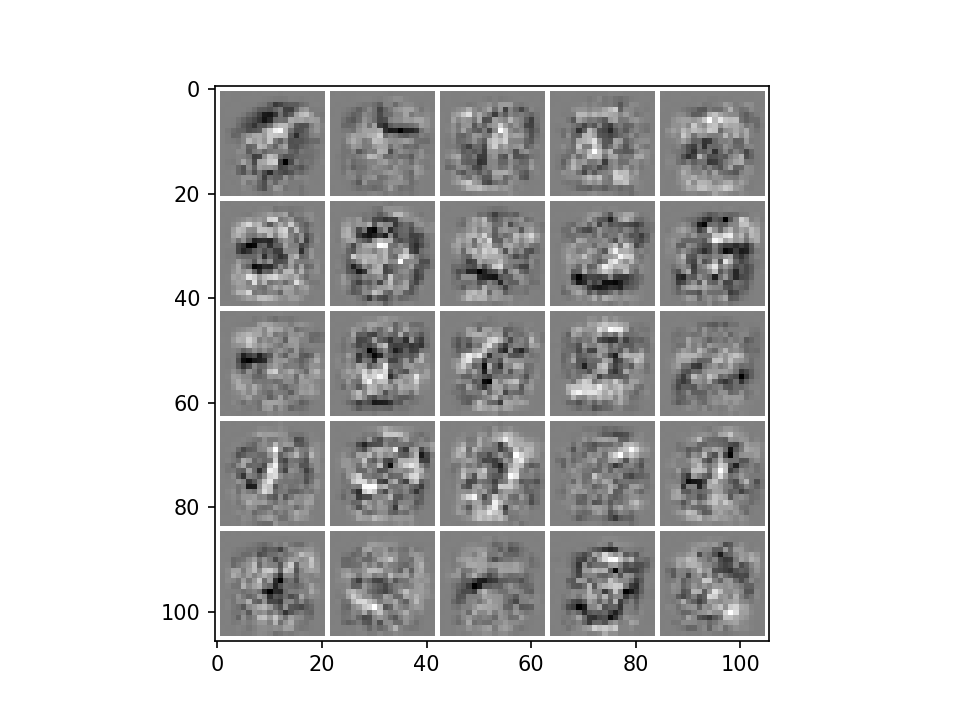

In [12]:
theta_1_ret = ret.x[:hidden_layer_size * (input_layer_size + 1)]
theta_1_ret = theta_1_ret.reshape(hidden_layer_size, input_layer_size + 1)

theta_2_ret = ret.x[(hidden_layer_size * (input_layer_size + 1)):]
theta_2_ret = theta_2_ret.reshape(num_labels, (hidden_layer_size + 1))

display_data(theta_1_ret[:, 1:])

### Calculate training set accuracy

In [13]:
from predict import predict

pred, conf = predict(theta_1_ret, theta_2_ret, X)
pred = pred + 1

accuracy = np.mean(np.int16(pred == y)) * 100
print(f'Training Set Accuracy: {accuracy}')

Training Set Accuracy: 99.52


### Does it work?

<IPython.core.display.Javascript object>


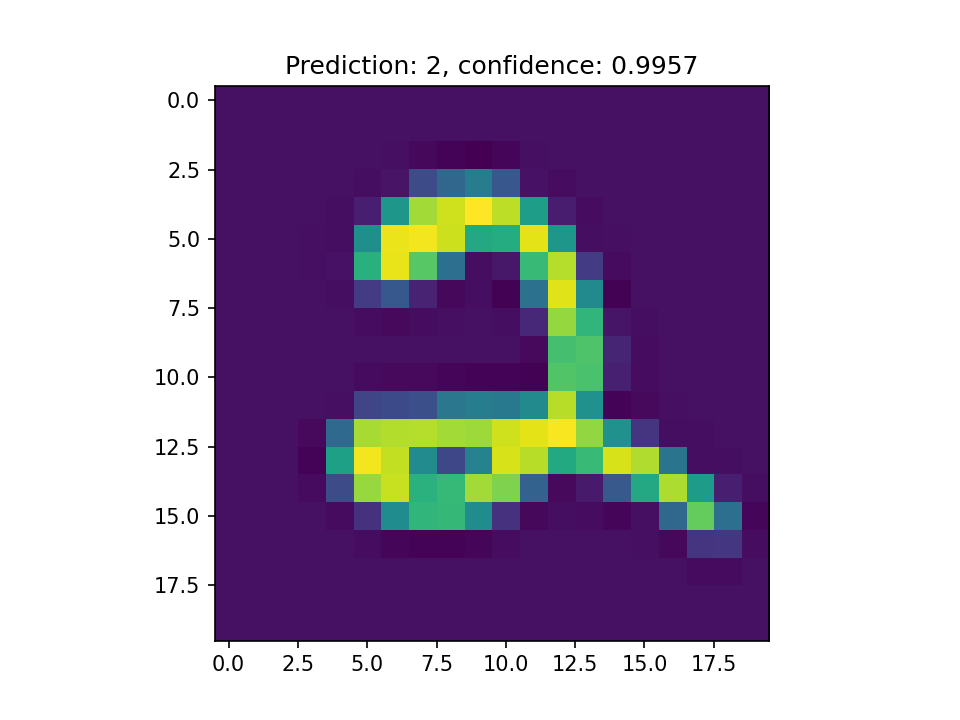

<IPython.core.display.Javascript object>


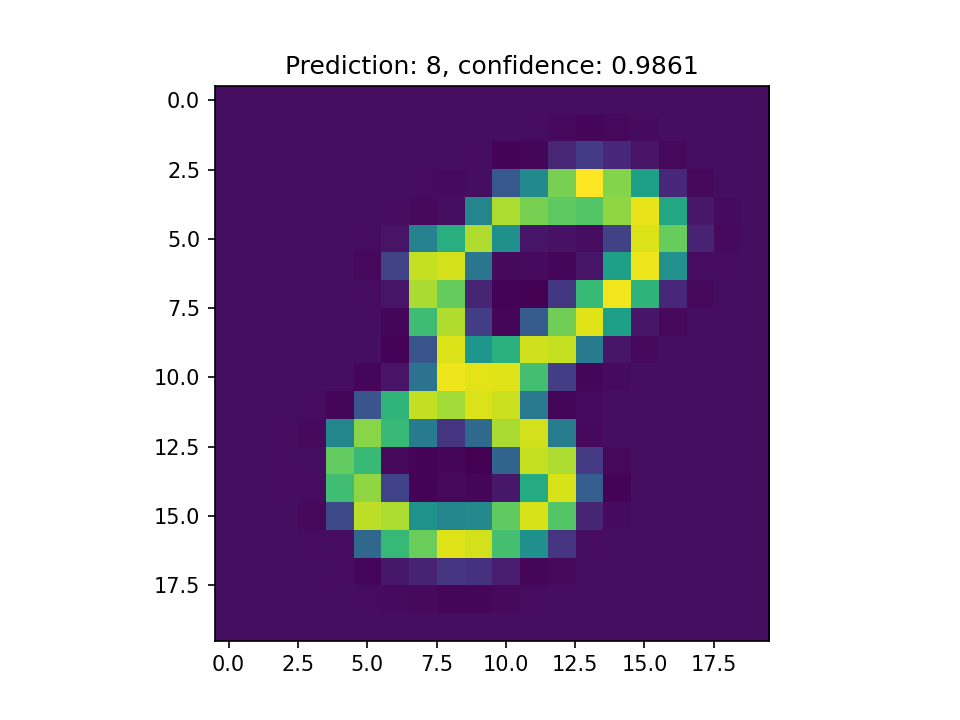

<IPython.core.display.Javascript object>


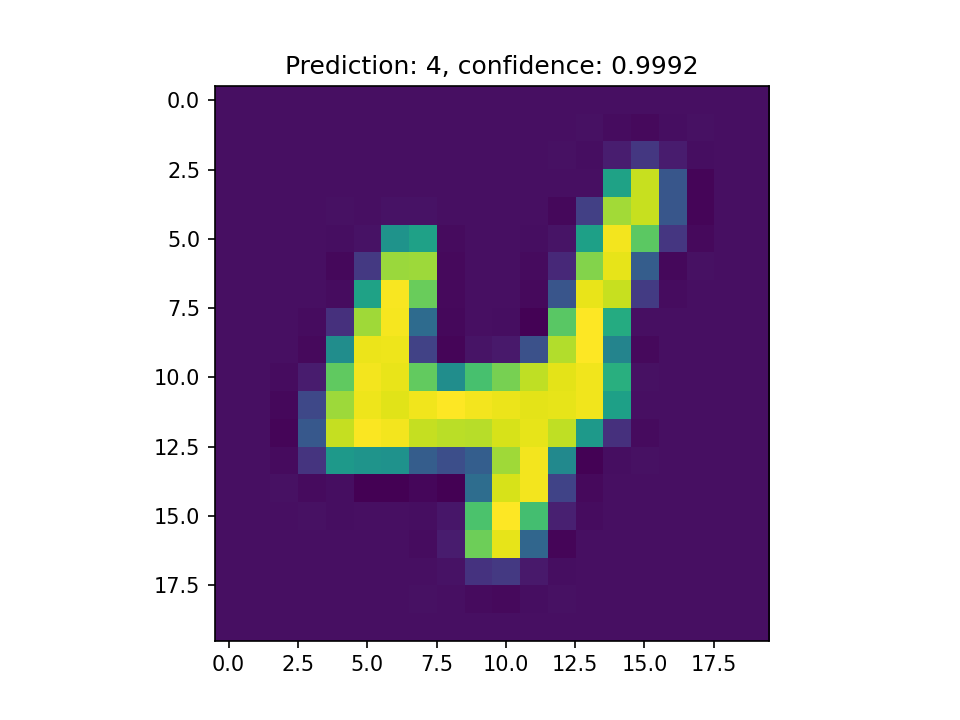

<IPython.core.display.Javascript object>


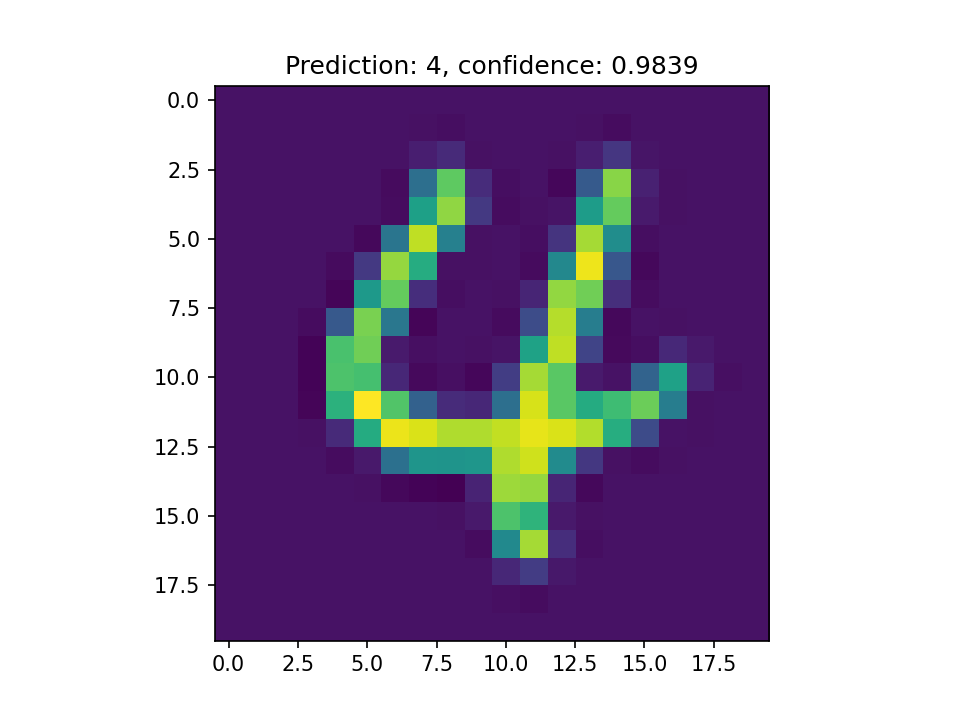

<IPython.core.display.Javascript object>


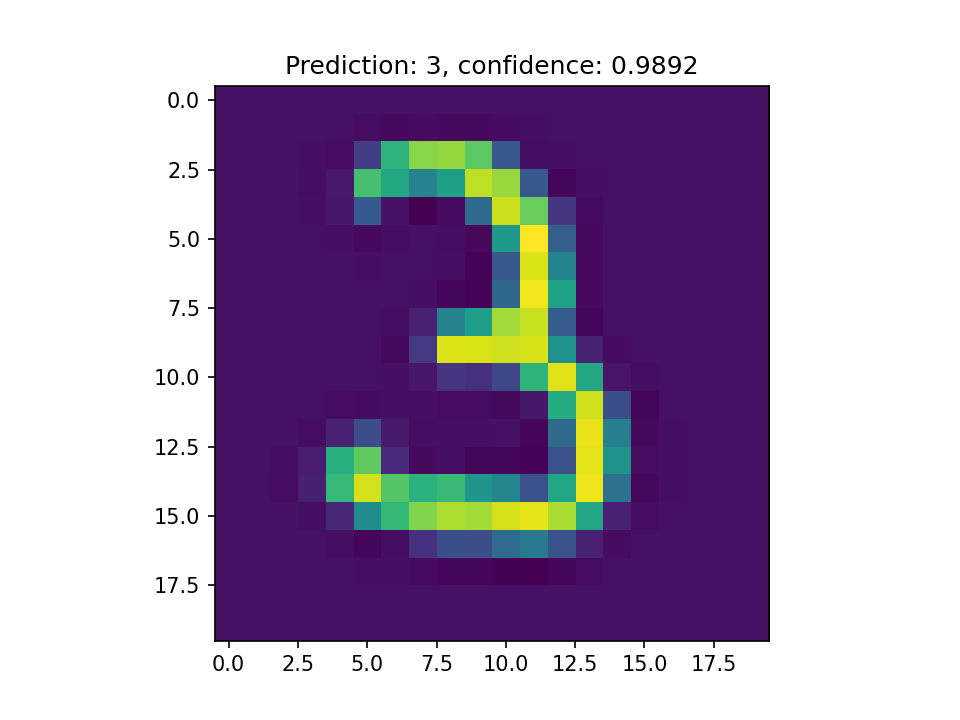

In [14]:
number_of_rows = X.shape[0]
rand_ind = np.random.choice(number_of_rows, size=5, replace=False)
selection = X[rand_ind]

def predict_and_plot(img):
    sample = img.reshape(1,-1)
    pred, conf = predict(theta_1_ret, theta_2_ret, sample)
    pred = pred.squeeze() + 1
    conf = conf.squeeze()

    plt.figure()
    plt.imshow(sample.reshape(20, 20).T)
    plt.title(f'Prediction: {pred}, confidence: {conf:.4f}')

for sample in selection:
    predict_and_plot(sample)
    

### Prediction on new samples

The trick seems to be to get the numbers quite close to the training set, and make sure to center them in the middle 10x10 box. Drawing on a 20x20 canvas using brush width 1, hardness 50% in paint.net.

<IPython.core.display.Javascript object>


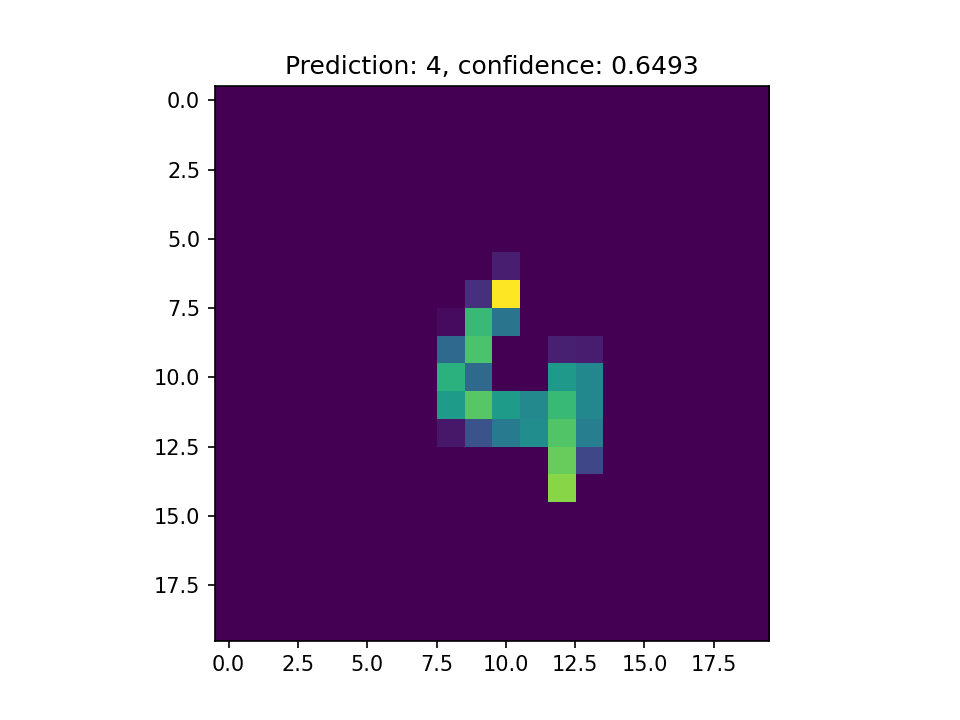

In [15]:
from scipy import ndimage

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def scale(img, maxdim: int = 20):
    scale = float(maxdim) / max(img.shape)
    return ndimage.zoom(img, scale, order=2)

img = plt.imread('number.png')
img = rgb2gray(img)
# img = ndimage.filters.gaussian_filter(img, sigma=5)
# img = autoscale(img)
img = img.T

predict_and_plot(img)